# NHST com Bootstrap

### Carga os dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

# Dataset
# https://drive.google.com/file/d/1B-ndRt4KTCKKjH9OS0KCRjA0WAeFqJ0-/view?usp=sharing

full_data = pd.read_csv('https://docs.google.com/uc?export=download&id=1B-ndRt4KTCKKjH9OS0KCRjA0WAeFqJ0-')
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [ ]:
full_data.shape

(2974, 4)

In [ ]:
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


### Definição da Hipótese Nula e Alternativa

Considerando que não existe um componente direcional nesta verificação:

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


Onde $\mu_{coff}$ e $\mu_{no}$ são as médias para os tomadores e não tomadores de café, respectivamente.

#### Diferença entre as médias das alturas (height) dos dois grupos (coff e nocoff)

In [ ]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [ ]:
coff_sample = sample_data[sample_data['drinks_coffee'] == True]['height']
nocoff_sample = sample_data[sample_data['drinks_coffee'] == False]['height']

coff_mean = coff_sample.mean()
nocoff_mean = nocoff_sample.mean()
diff_coff_nocoff_mean = abs(coff_mean-nocoff_mean)
diff_coff_nocoff_mean

1.334707109307388

### Exemplo de como funciona a reamostragem apenas na coluna contendo as alturas (height)

In [ ]:
bootsamp = sample_data.copy()
bootsamp['height'] = sample_data['height'].sample(frac=1).values
bootsamp.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,68.255596
2864,3670,>=21,True,67.310804
2167,7441,<21,False,65.168231
507,2781,>=21,True,68.539632
1817,2875,>=21,True,67.826861


### Bootstrap

In [ ]:
diffs = []

for _ in range(4000):
    
    bootsamp = sample_data.copy()
    bootsamp['height'] = sample_data['height'].sample(frac=1).values
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    
    diffs.append(coff_mean - nocoff_mean)   
    

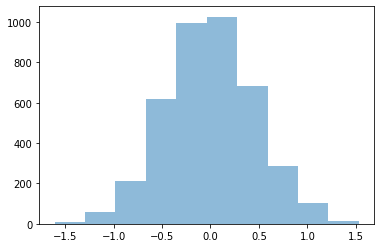

In [ ]:
plt.hist(diffs, alpha = 0.5);

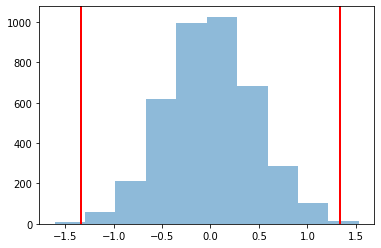

In [ ]:
plt.hist(diffs, alpha = 0.5)
plt.axvline(-diff_coff_nocoff_mean, color = 'red', linewidth=2)
plt.axvline(diff_coff_nocoff_mean, color = 'red', linewidth=2)

In [ ]:
greater_than = np.sum(np.array(diffs) > diff_coff_nocoff_mean)
greater_than

8

In [ ]:
less_than = np.sum(np.array(diffs) < -diff_coff_nocoff_mean)
less_than

6

In [ ]:
greater_than_abs = np.sum(abs(np.array(diffs)) > abs(diff_coff_nocoff_mean))
greater_than_abs

14

In [ ]:
p_value = (greater_than_abs)/4000
print('p=%.4f' % p_value)

p=0.0035


### Calculando com uma biblioteca
Documentação: [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [ ]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(coff_sample, nocoff_sample)
print('stat=%.3f, p=%.4f' % (stat, p))
if p > 0.05:
	print('Não podemos rejeitar a hipótese Nula. Nada mais a dizer.')
else:
	print('Podemos rejeitar a hipótese Nula. Isto sugere que a hipótese alternativa é verdadeira.')

stat=2.977, p=0.0033
Podemos rejeitar a hipótese Nula. Isto sugere que a hipótese alternativa é verdadeira.


## Testando a diferença entre proporções

Proporção de tomadores de café entre mais jovens VS mais velhos

In [ ]:
sample_data_2 = sample_data.copy()
sample_data_2['age'] = sample_data_2['age'].replace(['<21','>=21'],['younger','older'])

In [ ]:
sample_data_2.head()

,user_id,age,drinks_coffee,height
2402,2874,younger,True,64.357154
2864,3670,older,True,66.859636
2167,7441,younger,False,66.659561
507,2781,older,True,70.166241
1817,2875,older,True,71.369120


In [ ]:
younger_sample = sample_data_2[sample_data_2['age'] == 'younger']
older_sample = sample_data_2[sample_data_2['age'] == 'older']

younger_coff = younger_sample[younger_sample['drinks_coffee'] == True]
younger_nocoff = younger_sample[younger_sample['drinks_coffee'] == False]

older_coff = older_sample[older_sample['drinks_coffee'] == True]
older_nocoff = older_sample[older_sample['drinks_coffee'] == False]

#Conferindo os valores
print(len(sample_data_2), len(younger_sample), len(older_sample))
print(len(younger_sample), len(younger_coff), len(younger_nocoff))
print(len(older_sample), len(older_coff), len(older_nocoff))

200 94 106
94 25 69
106 94 12


### Cálculo da Proporção na Amostra

In [ ]:
younger_coff_prop = len(younger_coff)/len(younger_sample)
older_coff_prop = len(older_coff)/len(older_sample)
print(younger_coff_prop, older_coff_prop)

diff_younger_older_prop = abs(younger_coff_prop - older_coff_prop)
print('Diferença: %1.3f' % (diff_younger_older_prop))

0.26595744680851063 0.8867924528301887
Diferença: 0.621


### Bootstrap

In [ ]:
diffs_props = []

for _ in range(4000):
    
    bootsamp = sample_data_2.copy()
    bootsamp['drinks_coffee'] = bootsamp['drinks_coffee'].sample(frac=1).values
    
    bootsamp_younger = bootsamp[bootsamp['age'] == 'younger']
    bootsamp_older = bootsamp[bootsamp['age'] == 'older']
    
    bootsamp_younger_prop = len(bootsamp_younger[bootsamp_younger['drinks_coffee'] == True]) / len(bootsamp_younger)
    bootsamp_older_prop = len(bootsamp_older[bootsamp_older['drinks_coffee'] == True]) / len(bootsamp_older)
    
    diffs_props.append(bootsamp_younger_prop - bootsamp_older_prop)
    

In [ ]:
diffs_props[:100]

[-0.07888398233641103,
 -0.038739462063428265,
 0.0014050582095543884,
 -0.018667201926936938,
 -0.07888398233641103,
 -0.07888398233641103,
 -0.09895624247290247,
 -0.038739462063428265,
 0.0014050582095543884,
 -0.038739462063428265,
 0.0014050582095543884,
 -0.018667201926936938,
 0.0014050582095543884,
 0.10176635889201124,
 0.021477318346045826,
 -0.038739462063428265,
 0.04154957848253715,
 -0.07888398233641103,
 -0.0588117221999197,
 0.021477318346045826,
 -0.018667201926936938,
 0.021477318346045826,
 0.141910879164994,
 -0.018667201926936938,
 0.16198313930148533,
 0.021477318346045826,
 0.06162183861902848,
 -0.018667201926936938,
 0.10176635889201124,
 0.04154957848253715,
 -0.018667201926936938,
 0.04154957848253715,
 0.0014050582095543884,
 0.021477318346045826,
 0.04154957848253715,
 -0.1190285026093938,
 0.2021276595744681,
 -0.018667201926936938,
 -0.0588117221999197,
 -0.0588117221999197,
 0.12183861902850257,
 0.0014050582095543884,
 -0.018667201926936938,
 0.04154957

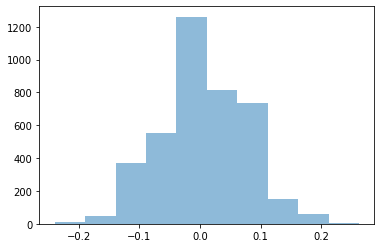

In [ ]:
plt.hist(diffs_props, alpha = 0.5);

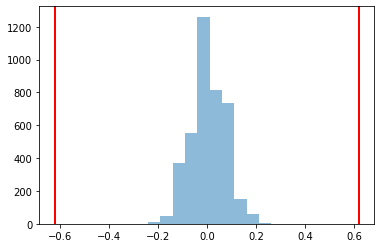

In [ ]:
plt.hist(diffs_props, alpha = 0.5)
plt.axvline(-diff_younger_older_prop, color = 'red', linewidth=2)
plt.axvline(diff_younger_older_prop, color = 'red', linewidth=2)

In [ ]:
greater_than_abs = np.sum(abs(np.array(diffs_props)) > abs(diff_younger_older_prop))
greater_than_abs

0

In [ ]:
p_value = (greater_than_abs)/4000
print('p=%.4f' % p_value)

p=0.0000


### Calculando com uma biblioteca
Documentação: [ztest](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

sample_success_a, sample_size_a = (len(younger_coff), len(younger_sample))
sample_success_b, sample_size_b = (len(older_coff), len(older_sample))

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p > 0.05:
	print('Não podemos rejeitar a hipótese Nula. Nada mais a dizer.')
else:
	print('Podemos rejeitar a hipótese Nula. Isto sugere que a hipótese alternativa é verdadeira.')

z_stat: -8.927, p_value: 0.000
Podemos rejeitar a hipótese Nula. Isto sugere que a hipótese alternativa é verdadeira.


### Biblioteca para Bootstrap

Scipy:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

# Como escolher um teste?

Na internet há vários fluxogramas para ajudar na seleção. 

**Exemplos:**

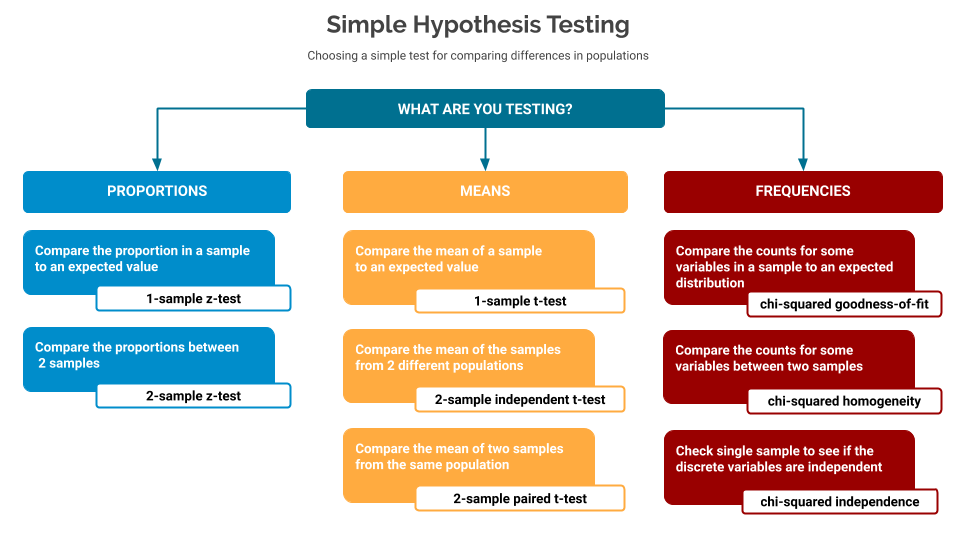

[Fonte da Imagem](https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/)

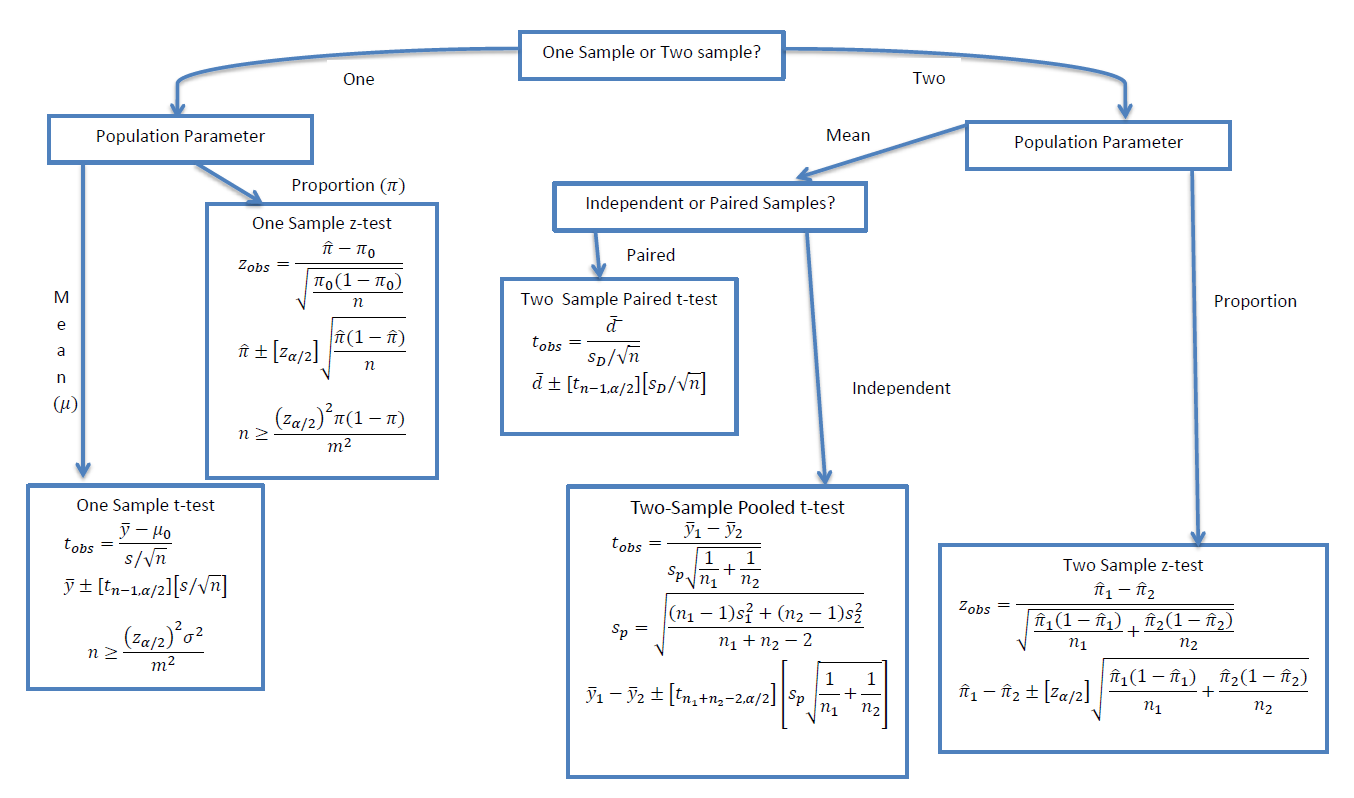

[Fonte da Imagem](https://towardsdatascience.com/which-hypothesis-test-to-perform-89d7044d34a1)

PDF:

https://www.peggykern.org/uploads/5/6/6/7/56678211/edu90790_decision_chart.pdf

### Antes de aplicar alguns testes, algumas suposições precisam ser verificadas

[Exemplo](https://www.pythonfordatascience.org/independent-samples-t-test-python/#:~:text=Typically%20is%20set%20to%200,n%201%20%2B%201%20n%202)